# Data Visualisation

In this notebook, the reader will find a graphical representation of the three different KPIs performed in _DBM: Project 2_ .

In [1]:
import numpy as np

import pandas as pd
from pandas import read_csv

import bokeh
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
from bokeh.models import HoverTool
from bokeh.models import ColumnDataSource, HoverTool, CDSView, ColumnDataSource, GroupFilter
from bokeh.plotting import figure
from bokeh.palettes import Spectral3
from bokeh.plotting import figure, show, output_file
# from bokeh.io import export_png

import pandas_bokeh
pandas_bokeh.output_notebook()

Loading BokehJS ...

## KPI 1: Average number of new listings per day

In this section the "KPI1.csv" file will be investigated further. 
This file holds the results from the KPI1: Average number of new listing per day, where the goal is to investigate the daily rate of listings over a timeperiod. 

In [2]:
data = pd.read_csv('../datasets/kpi1.csv', header=0, delimiter=',')
data.head()

,date,listings_count
0,2020-01-02T00:00:00.000+01:00,1
1,2020-01-08T00:00:00.000+01:00,9
2,2020-01-13T00:00:00.000+01:00,10
3,2020-01-23T00:00:00.000+01:00,50
4,2020-01-24T00:00:00.000+01:00,2


Import of the csv file, and a visualization of what the datafile looks like. 

In [3]:
data.listings_count.mean() #mean value new listing based on the days in the file

49.53658536585366

In [4]:
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d', exact=False)
data['listings_count_log'] = np.log(data['listings_count'])

In [5]:
%matplotlib inline

In [6]:
group = data.groupby('date').listings_count_log.sum()
source = ColumnDataSource(pd.DataFrame(group)) #creating columbdatasource to utilize the bokeh library 

p = figure(plot_height=400, toolbar_location=None, tools="", x_axis_type='datetime')
p.line(x='date', y='listings_count_log', source=source, line_width=2,legend_label='Average number of new listings per day' )
p.yaxis.axis_label = '(Log) Amount of listings'


hover = HoverTool()
hover.tooltips=[('date', '@date{%F}'), ('Listings', '@listings_count_log')]
hover.formatters={'@date': 'datetime'}

p.add_tools(hover)

show(p)
output_file('figures/kpi1.html')

As seen in the figure the date whith the most listing was 2020-07-12 with 2136 listings in total. 
On average there where posted 49,53 listings on the dates sampled in the dataset, and on average over the timeperiode it was 9.43 new listings daily.  

## KPI2: Correlation between rent price and family income per neighbourhood

This section aims to visualize the KPI 2: _"Correlation between rent price and family income per neighbourhood"_.

In [7]:
d = pd.read_csv('../datasets/kpi2.csv', header=0, delimiter=',')
d.head()

,neighborhood,mean_price,rfd
0,La Prosperitat,167150.000000,56.0
1,El Baix Guinardó,315222.222222,92.0
2,El Congrés i els Indians,320000.000000,75.1
3,Sant Genís dels Agudells,312172.413793,84.1
4,La Nova Esquerra de l'Eixample,460978.654362,110.2


In [8]:
d.plot_bokeh(kind='scatter',  
             x="rfd",
             y="mean_price",
             title='Correlation between rent price and family income',
             category='neighborhood',
             disable_scientific_axes="y")
output_file('figures/kpi2.html')

/home/arnau/.local/lib/python3.9/site-packages/pandas_bokeh/plot.py:1332: UserWarning: There are more than 5 categories in the scatterplot. The legend might be crowded, to hide the axis you can pass 'legend=False' as an optional argument.
  warnings.warn(


In [9]:
d.corr()

,mean_price,rfd
mean_price,1.000000,0.913799
rfd,0.913799,1.000000


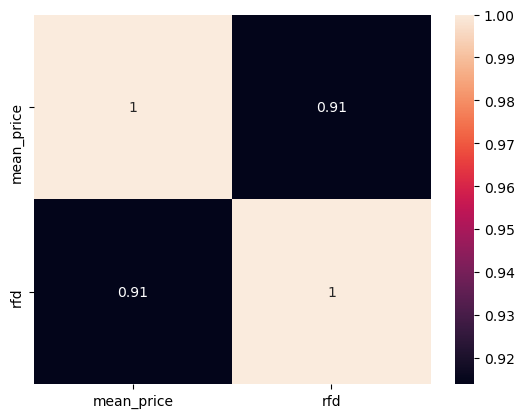

In [10]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

corrMatrix = d.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [11]:
#the correlation between sales price and family income per neighbourhood
d['mean_price'].corr(d['rfd'])

0.913799359629383

Based on KPI2 the correlation between the sales price per neighbourhood and family income is high, this the probability of a high family income in areas where the sales price is high.  

## KPI3: Correlation between the number of family members per listing and income per neighbourhood

In [12]:
dat = pd.read_csv('../datasets/kpi3.csv', header=0, delimiter=',')
dat.head()

,neighborhood,inhabitants_family,rfd
0,La Barceloneta Barcelona,2.16,79.6
1,Fort Pienc,2.60,106.5
2,Sagrada Família,2.38,101.8
3,L'Antiga Esquerra de l'Eixample,2.38,137.2
4,Hostafrancs,2.42,99.0


In [13]:
dat.plot_bokeh(kind='scatter',  
             x="rfd",
             y="inhabitants_family",
             title='Correlation between number of family members and income per neighborhood',
             category='neighborhood',
             disable_scientific_axes="y")
output_file('figures/kpi3.html')

/home/arnau/.local/lib/python3.9/site-packages/pandas_bokeh/plot.py:1332: UserWarning: There are more than 5 categories in the scatterplot. The legend might be crowded, to hide the axis you can pass 'legend=False' as an optional argument.
  warnings.warn(


Correlation between inhabitants in a family, and rdf. 

In [14]:
dat.corr()

,inhabitants_family,rfd
inhabitants_family,1.000000,0.052658
rfd,0.052658,1.000000


According to our hypothesis families with lower income would have an in crease in inhabitants per family. Some areas with earlier classified lower income, such as _"Gothic Quarter"_, had an elevated number of inhabitants per family. 

However, with a correlation factor of $0.05 \approx 5%$, the correlation between income and inhabitants per family is not clear and more data is needed to either falsify or substantiate the hypothesis. 


From this analysis it therefore is no clear correlation between family income and inhabitants per family. 